In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## TODO

- [x] clean data
- [x] analyse
- [ ] visulise analysis
- [x] model
- [x] test model
- [x] Confusion Matrix
- [x] ROC curve
- [ ] Dispersion analysis

# Data Analysis

In [2]:
train_df = pd.read_csv('../data/train.csv').set_index('PassengerId')
train_df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [3]:
train_df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
train_df.corr()

Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000

In [7]:
train_df.cov()

Survived     Pclass         Age     SibSp     Parch         Fare
Survived  0.236772  -0.137703   -0.551296 -0.018954  0.032017     6.221787
Pclass   -0.137703   0.699015   -4.496004  0.076599  0.012429   -22.830196
Age      -0.551296  -4.496004  211.019125 -4.163334 -2.344191    73.849030
SibSp    -0.018954   0.076599   -4.163334  1.216043  0.368739     8.748734
Parch     0.032017   0.012429   -2.344191  0.368739  0.649728     8.661052
Fare      6.221787 -22.830196   73.849030  8.748734  8.661052  2469.436846

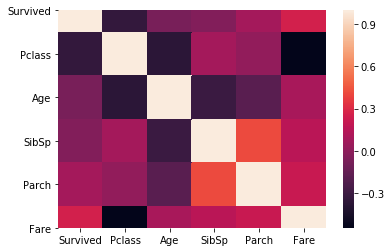

In [8]:
sns.heatmap(train_df.corr());

# Data cleaning

In [9]:
def replace_sex(sex):
    if sex == 'male':
        return 1
    elif sex == 'female':
        return 2

In [10]:
train_df['Sex'] = train_df.Sex.apply(replace_sex)

In [11]:
train_df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name  Sex   Age  \
PassengerId                                                                 
1                                      Braund, Mr. Owen Harris    1  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...    2  38.0   
3                                       Heikkinen, Miss. Laina    2  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)    2  35.0   
5                                     Allen, Mr. William Henry    1  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

**Had to replace the values of sex into numbers. This is tell help the Logistic Regression Model**

In [12]:
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [13]:
train_df['Age'].min()

0.42

In [14]:
train_df[train_df['Age'] == 0.42]

Survived  Pclass                             Name  Sex   Age  \
PassengerId                                                                 
804                 1       3  Thomas, Master. Assad Alexander    1  0.42   

             SibSp  Parch Ticket    Fare Cabin Embarked  
PassengerId                                              
804              0      1   2625  8.5167   NaN        C

In [15]:
train_df = train_df.fillna(train_df.mean())

In [16]:
train_df.tail()

Survived  Pclass                                      Name  Sex  \
PassengerId                                                                    
887                 0       2                     Montvila, Rev. Juozas    1   
888                 1       1              Graham, Miss. Margaret Edith    2   
889                 0       3  Johnston, Miss. Catherine Helen "Carrie"    2   
890                 1       1                     Behr, Mr. Karl Howell    1   
891                 0       3                       Dooley, Mr. Patrick    1   

                   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
PassengerId                                                             
887          27.000000      0      0      211536  13.00   NaN        S  
888          19.000000      0      0      112053  30.00   B42        S  
889          29.699118      1      2  W./C. 6607  23.45   NaN        S  
890          26.000000      0      0      111369  30.00  C148        C  
891          32.000000      0      0      370376   7.75   NaN        Q

In [17]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Replaced the Nan ages with means. There were too many missing values for me to drop, so I had to replace them**

In [18]:
train_df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [20]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

**Found that there were 2 missing values from 'Embarked' column. Decided to replace them with the most frequent which is S**

In [21]:
train_df.shape

(891, 11)

In [22]:
train_df = train_df.drop(['Name', 'Cabin', 'Ticket'], axis=1)
train_df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                             
1                   0       3    1  22.0      1      0   7.2500        S
2                   1       1    2  38.0      1      0  71.2833        C
3                   1       3    2  26.0      0      0   7.9250        S
4                   1       1    2  35.0      1      0  53.1000        S
5                   0       3    1  35.0      0      0   8.0500        S

**Dropped the 'Cabin' column as there were too many missing values and do not think it would have helped in the prediction. I then dropped the 'Ticket' since there were too many unique values and they couldn't be converted to numerical representations. Dropped the 'Name' column as this wouldn't determine the reason for their survival. Their importance can be explained by their 'Pclass'**

In [23]:
def replace_embark(embark):
    if embark == 'C':
        return 1
    elif embark == 'Q':
        return 2
    elif embark == 'S':
        return 3

In [24]:
train_df['Embarked'] = train_df['Embarked'].apply(replace_embark)
train_df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                              
1                   0       3    1  22.0      1      0   7.2500         3
2                   1       1    2  38.0      1      0  71.2833         1
3                   1       3    2  26.0      0      0   7.9250         3
4                   1       1    2  35.0      1      0  53.1000         3
5                   0       3    1  35.0      0      0   8.0500         3

- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

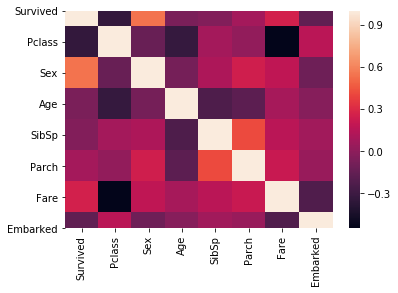

In [25]:
sns.heatmap(train_df.corr());

In [26]:
train_df.corr()

Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.069809 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.331339  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.084153  0.114631  0.245489   
Age      -0.069809 -0.331339 -0.084153  1.000000 -0.232625 -0.179191   
SibSp    -0.035322  0.083081  0.114631 -0.232625  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.179191  0.414838  1.000000   
Fare      0.257307 -0.549500  0.182333  0.091566  0.159651  0.216225   
Embarked -0.167675  0.162098 -0.108262 -0.026749  0.068230  0.039798   

              Fare  Embarked  
Survived  0.257307 -0.167675  
Pclass   -0.549500  0.162098  
Sex       0.182333 -0.108262  
Age       0.091566 -0.026749  
SibSp     0.159651  0.068230  
Parch     0.216225  0.039798  
Fare      1.000000 -0.224719  
Embarked -0.224719  1.000000

In [27]:
train_df = train_df.drop(['Fare', 'Parch', 'Embarked'], axis=1)

**Dropping the 'Fare' column since it is highly correlated to 'Pclass'. So I decided to use the 'Pclass' as the deciding factor**

# Data Understanding

In [28]:
num_survive = len(train_df[train_df['Survived'] == 1])
num_dead = len(train_df[train_df['Survived'] == 0])

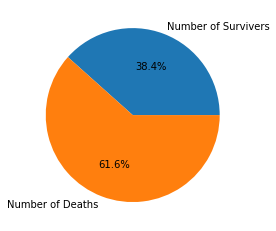

In [29]:
plt.pie([num_survive, num_dead], labels=['Number of Survivers', 'Number of Deaths'], autopct='%1.1f%%')
plt.show();

As you can see from the pie chart above that there were more deaths from the Titanic than survivors. It was well documented that this was one of the most tragic ship crashes in history. The main reason was that there were not enough safety boats onboard. This posed the question on who was selected to be on those limited boats.

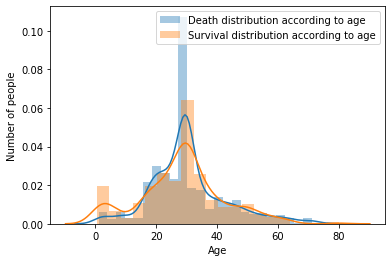

In [73]:
age_dead = train_df[train_df['Survived'] == 0].Age
age_survive = train_df[train_df['Survived'] == 1].Age

sns.distplot(age_dead, label='Death distribution according to age')
sns.distplot(age_survive, label='Survival distribution according to age')
plt.ylabel('Number of people')
plt.legend(loc='best')
plt.show();

From the distribution plot, there were more death to suvival ratio to people from the ages of 20 to 50 years. The only prominent time the ratio leans towards survival, it is for people under the age of 20 years. This would mean age was a factor to your survival, but it wasn't much of a signigicant one.

In [65]:
higher_class = train_df[train_df['Pclass'] == 1]
middle_class = train_df[train_df['Pclass'] == 2]
lower_class = train_df[train_df['Pclass'] == 3]

classes = {'higher_class': higher_class,'middle_class': middle_class,'lower_class': lower_class}

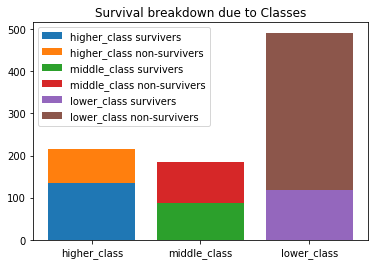

In [75]:
for pclass in classes:
    surv = len(classes[pclass][classes[pclass]['Survived'] == 1])
    dead = len(classes[pclass][classes[pclass]['Survived'] == 0])
    plt.bar(str(pclass), surv, label=f'{pclass} survivers')
    plt.bar(str(pclass), dead, bottom=surv, label=f'{pclass} non-survivers')

plt.title('Survival breakdown due to Classes')
plt.legend(loc='best')
plt.show();

The above graph is the breakdown of the different classes that were located on the ship. The `higher_class` are the people that were very presitigious and wellknown. These were the people who had a lot of money and regarded as "important". There is another difference in death to suvival ratios between the different classes. There is a better ratio for the `higher_class` than the `lower_class`. It is important to keep in mind though that there were more `lower_class` people than `higher_class`. This could have caused the imbalance in the ratios.

# Modelling

In [35]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [36]:
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']

X = sm.add_constant(X);

/home/wonderboy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
reg_log = sm.Logit(y, X)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.443796
         Iterations 6


In [39]:
pclass = np.exp(-1.1435)
sex = np.exp(2.7437)
age = np.exp(-0.0396)
sibs = np.exp(-0.3159)
parents = np.exp(-0.0803)
embarked = np.exp(-0.2408)

In [40]:
print(f'I am {pclass}x more likly to survive depending on my class increase.')
print(f'I am {sex}x more likly to survive depending on my sex.')
print(f'I am {age}x more likly to survive depending on my age.')
print(f'I am {sibs}x more likly to survive depending on whether I have siblings.')
print(f'I am {parents}x more likly to survive depending on whether I have parents.')
print(f'I am {embarked}x more likly to survive depending on where I embarked.')

I am 0.3187016118480803x more likly to survive depending on my class increase.
I am 15.544393080474114x more likly to survive depending on my sex.
I am 0.9611738318013887x more likly to survive depending on my age.
I am 0.7291323597580593x more likly to survive depending on whether I have siblings.
I am 0.9228394530188017x more likly to survive depending on whether I have parents.
I am 0.7859988104315035x more likly to survive depending on where I embarked.


In [48]:
pred_vals = results_log.predict(X)
train_df['predicted survival'] = round(pred_vals)
train_df.head()

Survived  Pclass  Sex   Age  SibSp  predicted survival
PassengerId                                                        
1                   0       3    1  22.0      1                 0.0
2                   1       1    2  38.0      1                 1.0
3                   1       3    2  26.0      0                 1.0
4                   1       1    2  35.0      1                 1.0
5                   0       3    1  35.0      0                 0.0

In [38]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.3336
Time:                        20:57:15   Log-Likelihood:                -395.42
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.236e-84
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2876      0.455     -0.633      0.527      -1.179       0.603
Pclass        -1.1724      0.120     -9.792      0.000      -1.407      -0.938
Sex            2.7398      0.194     14.112      0.000       2.359       3.120
Age           -0.0398      0.008     -5.131      0.000      -0.055      -0.025
SibSp         -0.3578      0.104     -3.439      0.001      -0.562      -0.154
==============================================================================
"""

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [50]:
cm_df = pd.DataFrame(confusion_matrix(y, train_df['predicted survival']), columns=['Actual Survived','Actual Dead'],index=['Predicted Survived','Predicted Dead'])
cm_df

Actual Survived  Actual Dead
Predicted Survived              458           91
Predicted Dead                   98          244

In [46]:
acc = roc_auc_score(train_df['Survived'], train_df['predicted survival'])

In [47]:
roc_curve(train_df['Survived'], train_df['predicted survival'])

(array([0.        , 0.16575592, 1.        ]),
 array([0.        , 0.71345029, 1.        ]),
 array([2., 1., 0.]))

In [48]:
ns_fpr, ns_tpr, _ = roc_curve(train_df['Survived'], train_df['predicted survival'])
_

array([2., 1., 0.])

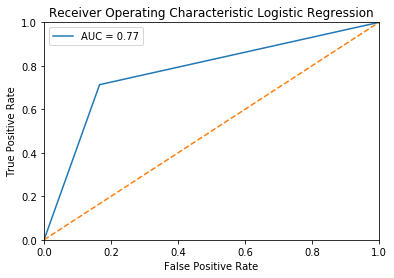

In [49]:
plt.plot(ns_fpr, ns_tpr, label = 'AUC = %0.2f' % acc)
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'best')
plt.title('Receiver Operating Characteristic Logistic Regression')
plt.show()

# Testing the model

In [55]:
test_df = pd.read_csv('../data/test.csv').set_index('PassengerId')
test_df = test_df[train_df.drop(['Survived', 'predicted survival'], axis=1).columns]
test_df.head()

Pclass     Sex   Age  SibSp
PassengerId                             
892               3    male  34.5      0
893               3  female  47.0      1
894               2    male  62.0      0
895               3    male  27.0      0
896               3  female  22.0      1

In [56]:
test_df['Sex'] = test_df['Sex'].apply(replace_sex)
test_df = test_df.fillna(test_df.mean())

In [57]:
test_df.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
dtype: int64

In [58]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 4 columns):
Pclass    418 non-null int64
Sex       418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
dtypes: float64(1), int64(3)
memory usage: 16.3 KB


In [59]:
test_vals = np.array(test_df)

test_vals = sm.add_constant(test_vals)
pred_vals = results_log.predict(test_vals)

test_df['Probability of Survival'] = pred_vals

In [60]:
test_df['Probability of Survival'] = round(test_df['Probability of Survival'])
test_df

Pclass  Sex       Age  SibSp  Probability of Survival
PassengerId                                                       
892               3    1  34.50000      0                      0.0
893               3    2  47.00000      1                      0.0
894               2    1  62.00000      0                      0.0
895               3    1  27.00000      0                      0.0
896               3    2  22.00000      1                      1.0
...             ...  ...       ...    ...                      ...
1305              3    1  30.27259      0                      0.0
1306              1    2  39.00000      0                      1.0
1307              3    1  38.50000      0                      0.0
1308              3    1  30.27259      0                      0.0
1309              3    1  30.27259      1                      0.0

[418 rows x 5 columns]

In [61]:
results_log.pvalues

const     5.269147e-01
Pclass    1.214317e-22
Sex       3.187680e-45
Age       2.879413e-07
SibSp     5.834543e-04
dtype: float64